<a href="https://colab.research.google.com/github/Junseokee/Deep_Learning/blob/main/220914_%EB%84%A4%EC%9D%B4%EB%B2%84_%EB%89%B4%EC%8A%A4_%EB%B6%84%EB%A5%98_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
myfile = files.upload()

Saving korean_stopword.csv to korean_stopword.csv


In [2]:
!pip install gdown
!gdown --id 15kGgL0GGkzZdUzlJZwayDzHA7HZ9hoqW --output /content/newsData.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15kGgL0GGkzZdUzlJZwayDzHA7HZ9hoqW
To: /content/newsData.zip
100% 2.21M/2.21M [00:00<00:00, 146MB/s]


In [3]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive

In [6]:
import os
import zipfile

In [8]:
with zipfile.ZipFile('/content/newsData.zip', 'r') as existiong_zip:
  existiong_zip.extractall('/content/newsData')

In [20]:
original_dataset_dir = '/content/newsData'

policy_dir = original_dataset_dir + '/0'
economy_dir = original_dataset_dir + '/1'
social_dir = original_dataset_dir + '/2'
culture_dir = original_dataset_dir + '/3'
intet_dir = original_dataset_dir + '/4'
science_dir = original_dataset_dir + '/5'
ent_dir = original_dataset_dir + '/6'
sports_dir = original_dataset_dir + '/7'

In [30]:
policy_lst = os.listdir(policy_dir)
economy_lst = os.listdir(economy_dir)
social_lst = os.listdir(social_dir)
culture_lst = os.listdir(culture_dir)
intet_lst = os.listdir(intet_dir)
science_lst = os.listdir(science_dir)
ent_lst = os.listdir(ent_dir)
sports_lst = os.listdir(sports_dir)

In [17]:
policy_lst[:5]

['0172NewsData.txt',
 '0049NewsData.txt',
 '0108NewsData.txt',
 '0076NewsData.txt',
 '0067NewsData.txt']

In [19]:
import re
f = open(os.path.join(policy_dir, '0000NewsData.txt'), 'r', encoding = 'utf-8')
data = re.sub('[\n\'\t]',"",f.read())
print(data)
f.close()

동남아 담당 北 최희철 부상 베이징 도착…싱가포르행 주목최 부상, 행선지·방문 목적 질문에는 묵묵부답(베이징=연합뉴스) 김진방 특파원 = 북한이 북미 정상회담 무산 가능성까지 거론하며 강경한 태도를 보이는 가운데 동남아시아 외교를 담당하는 최희철 북한 외무성 부상이 19일 중국 베이징 서우두(首都) 공항에 모습을 드러냈다.최 부상은 이날 오전 평양발 고려항공 JS151편을 이용해 베이징 서우두 공항에 도착했다.최 부상은 최종 목적지를 묻는 취재진의 질문에 아무런 답변을 하지 않고, 북한 대사관 관계자들과 함께 공항을 빠져나갔다.북미 정상회담을 20여 일 앞둔 상황에서 동남아 외교통인 최 부상이 정상회담 준비 등을 위해 회담 개최 예정지인 싱가포르를 방문할 가능성도 제기되고 있다.최 부상은 지난 3월에도 아세안(ASEAN·동남아시아국가연합) 의장국이기도 한 싱가포르를 방문해 양국관계와 올해 8월 열리는 아세안지역안보포럼(ARF) 의제 등을 논의한 바 있다.또 지난해 북핵 문제를 두고 북미 간 긴장관계가 형성됐을 때도 ARF에 참석해 아세안을 상대로 여론전을 펼쳤다. 북한의 초청으로 비자이 쿠마르 싱 인도 외교부 국무장관이 방북했을 때도 최 부상은 싱 국무장관을 직접 영접하고, 한반도 문제를 논의하기도 했다.베이징 소식통은 "최 부상이 대(對)미 외교담당이 아니기 때문에 싱가포르로 갈 가능성이 큰 것은 아니다"며 "만약 싱가포르에 간다면 정상회담과 관련한 지원 작업 준비 등을 위한 것일 가능성이 크다"고 말했다.


In [58]:
dataset_lst = []
dataset_lab = []
import pandas as pd

sub_text = '[^a-zA-Zㄱ-ㅣ가-힣0-9]'
for doc_num in policy_lst:
  f = open(os.path.join(policy_dir, doc_num), 'r', encoding = 'utf-8')
  data = re.sub(sub_text," ", f.read())
  f.close()
  dataset_lst.append(data)
  dataset_lab.append(0)

for doc_num in economy_lst:
  f = open(os.path.join(economy_dir, doc_num), 'r', encoding = 'utf-8')
  data = re.sub(sub_text," ", f.read())
  f.close()
  dataset_lst.append(data)
  dataset_lab.append(1)
  
for doc_num in social_lst:
  f = open(os.path.join(social_dir, doc_num), 'r', encoding = 'utf-8')
  data = re.sub(sub_text," ", f.read())
  f.close()
  dataset_lst.append(data)
  dataset_lab.append(2)

for doc_num in culture_lst:
  f = open(os.path.join(culture_dir, doc_num), 'r', encoding = 'utf-8')
  data = re.sub(sub_text," ", f.read())
  f.close()
  dataset_lst.append(data)
  dataset_lab.append(3)

for doc_num in intet_lst:
  f = open(os.path.join(intet_dir, doc_num), 'r', encoding = 'utf-8')
  data = re.sub(sub_text," ", f.read())
  f.close()
  dataset_lst.append(data)
  dataset_lab.append(4)

for doc_num in science_lst:
  f = open(os.path.join(science_dir, doc_num), 'r', encoding = 'utf-8')
  data = re.sub(sub_text," ", f.read())
  f.close()
  dataset_lst.append(data)
  dataset_lab.append(5)

for doc_num in ent_lst:
  f = open(os.path.join(ent_dir, doc_num), 'r', encoding = 'utf-8')
  data = re.sub(sub_text," ", f.read())
  f.close()
  dataset_lst.append(data)
  dataset_lab.append(6)

for doc_num in sports_lst:
  f = open(os.path.join(sports_dir, doc_num), 'r', encoding = 'utf-8')
  data = re.sub(sub_text," ", f.read())
  f.close()
  dataset_lst.append(data)
  dataset_lab.append(7)

In [59]:
len(dataset_lst)

1600

In [60]:
len(dataset_lab)

1600

In [61]:
import pandas as pd

dataset_df = pd.DataFrame({'data':dataset_lst, 'label': dataset_lab})
dataset_df.head(10)


,data,label
0,북한 억류자 3명 송환 환영 6명도 조속 송환을 머니투데이 최경민 ...,0
1,송영무 문정인 맥스선더에 B 52전폭기 전개 안되게 했다 발언 놓고 논란...,0
2,원희룡 후보 토론장서 제2공항 반대 주민에게 폭행 당해 종합 가해자 계란 던지...,0
3,원희룡에 달려들어 계란 던지고 폭행 흉기로 자해 시도 앵커 제주시에서 열린 ...,0
4,반격한 김계관 한겨레 6자회담 대표 지낸 외교 전문가 과거 볼턴과 상대하며 각...,0
5,남북관계 급제동 판문점 선언 후속조치 어떻게 되나 대화 중단 카드까지 거론 ...,0
6,단독 바른미래당 진수희 서울시당위원장 사퇴 유 안 송파을 공천갈등 폭발 바른미...,0
7,드루킹 검찰 수사축소 시도 vs 드루킹이 수사축소 요구 종합2보 드루...,0
8,종합 김경수 드루킹 옥중편지 에 황당하고 어처구니 없는 소설 거리낄 게 ...,0
9,이낙연 청년들 좌절 커지고 있다 국회에 추경 처리 호소 서울 뉴시스 이재우 기...,0


In [62]:
k_stopword = pd.read_csv('/content/korean_stopword.csv')
#list():
stopword = list(k_stopword['불용어'])+['을','은','를','이가','과','의','는','에','가','이','은','들','좀','잘','잘','걍','도','들','으로','자','에','와','한','하다','있다','되다','에서']

stopword[:5]

['이', '있', '하', '것', '들']

In [63]:
from konlpy.tag import Okt
okt =Okt()

morphs_lst = []
for i in dataset_df.index:
  morphs = ""
  morph = okt.morphs(dataset_df.loc[i]['data'], stem=True)
  for txt in morph:
    if txt not in stopword:
    #mophs.append(txt)
      morphs = morphs + " " + txt
  morphs_lst.append(morphs)
dataset_df['morphs'] = morphs_lst
dataset_df.head()

,data,label,morphs
0,북한 억류자 3명 송환 환영 6명도 조속 송환을 머니투데이 최경민 ...,0,북한 억류 3 송환 환영 6 명도 조속 송환 머니투데이 최경민 기자 the 300...
1,송영무 문정인 맥스선더에 B 52전폭기 전개 안되게 했다 발언 놓고 논란...,0,송영 무 문정인 맥스 선더 B 52 전폭기 전개 안되다 발언 놓다 논란 서울 뉴시...
2,원희룡 후보 토론장서 제2공항 반대 주민에게 폭행 당해 종합 가해자 계란 던지...,0,원희룡 후보 토론 장서 2 공항 반대 주민 에게 폭행 당하다 종합 가해자 계란 던...
3,원희룡에 달려들어 계란 던지고 폭행 흉기로 자해 시도 앵커 제주시에서 열린 ...,0,원희룡 달려들다 계란 던지다 폭행 흉기 자해 시도 앵커 제주시 열리다 제주도 지사...
4,반격한 김계관 한겨레 6자회담 대표 지낸 외교 전문가 과거 볼턴과 상대하며 각...,0,반격 김계관 한겨레 6 회담 대표 지내다 외교 전문가 과거 볼턴 상대 각 세우다 ...


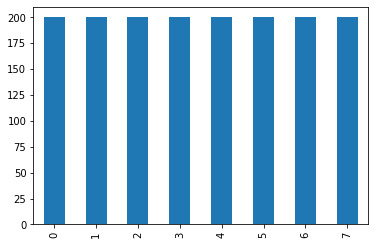

In [64]:
dataset_df['label'].value_counts().plot(kind ='bar')

In [65]:
from sklearn.model_selection import train_test_split

x = dataset_df['morphs']
y = dataset_df['label']
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                    random_state=11)

In [66]:
print('학습 데이터의 수 : ', x_train.shape[0])

학습 데이터의 수 :  1280


In [68]:
print('학습 데이터의 수 : ', x_test.shape[0])

학습 데이터의 수 :  320


In [69]:
print('학습데이터의 라벨 분포')
y_train.value_counts()

학습데이터의 라벨 분포


0    166
2    162
5    161
6    160
7    159
1    159
3    158
4    155
Name: label, dtype: int64

In [70]:
print('테스트데이터의 라벨 분포')
y_test.value_counts()

테스트데이터의 라벨 분포


4    45
3    42
7    41
1    41
6    40
5    39
2    38
0    34
Name: label, dtype: int64

In [71]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 정수 인코딩(사전만들기)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [72]:
print(tokenizer.word_index)

{'이다': 1, '인': 2, '돼다': 3, '않다': 4, '하고': 5, '1': 6, '없다': 7, '다': 8, '받다': 9, '2': 10, '보다': 11, '기자': 12, '며': 13, '3': 14, '한국': 15, '밝히다': 16, '에게': 17, '서울': 18, '늘다': 19, '오다': 20, '위': 21, '이라고': 22, '가다': 23, '지난': 24, '따르다': 25, '북한': 26, '에는': 27, '날': 28, '아니다': 29, '같다': 30, '미국': 31, '4': 32, '당': 33, '5': 34, '대해': 35, '부터': 36, '대한': 37, '성': 38, '못': 39, '대통령': 40, '이번': 41, '관련': 42, '크다': 43, '6': 44, '통해': 45, '라고': 46, '장': 47, '위해': 48, '만': 49, '보이다': 50, '중국': 51, '경찰': 52, '정부': 53, '나오다': 54, '이후': 55, '대표': 56, 'a': 57, '서': 58, '대': 59, '게': 60, '많다': 61, '에서는': 62, '조사': 63, '지난해': 64, '의원': 65, '기': 66, '함께': 67, '뒤': 68, '세': 69, '7': 70, '라며': 71, '혐의': 72, '들다': 73, '연': 74, '관계자': 75, '대다': 76, '후보': 77, '상황': 78, '에도': 79, '김': 80, '대회': 81, '최근': 82, '달': 83, '진행': 84, '간': 85, '확인': 86, '결과': 87, '좋다': 88, '하지만': 89, '9': 90, '시장': 91, '현재': 92, '상': 93, '이상': 94, '예정': 95, '주장': 96, '경기': 97, '열리다': 98, '그렇다': 99, '설명': 100, '사건': 101, '팀': 102, '8'

In [74]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 3보다 작은 단어ㅢ 개수 카운트
total_freq = 0 # 훈련데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈더수가 3보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  # 단어의 등장 빈도수가 3보다 작으면
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합의 크기 : ', total_cnt)
print('등장빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold-1,rare_cnt))
print("단어 집합에서 희귀 단어의 비율: ",(rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : ',\
      (rare_freq / total_freq)*100)

단어 집합의 크기 :  25521
등장빈도가 2번 이하인 희귀 단어의 수 : 13012
단어 집합에서 희귀 단어의 비율:  50.98546295207868
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :  4.8013420095278105


In [76]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2 (사전에 없는단어)
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 : ', vocab_size)

단어 집합의 크기 :  12511


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_tesrt = tokenizer.texts_to_sequences(x_test)

문서의 최대 길이 :  792
문서의 평균 길이 :  273.37734375


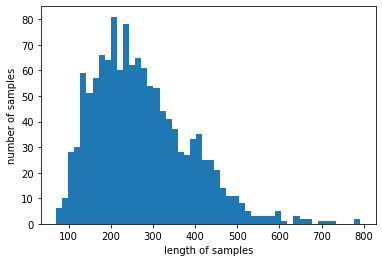

In [80]:
# 패딩 범위를 지정해주기 위함
import matplotlib.pyplot as plt

print('문서의 최대 길이 : ', max(len(l) for l in x_train))
print('문서의 평균 길이 : ', sum(map(len,x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [83]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
      cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%\
    (max_len, (cnt / len(nested_list)) *100))

In [ ]:
max_len = 500
below_threshold_len(max_len, x_train)

In [91]:
from tensorflow.keras.preprocessing import sequence

print('시퀀스 패딩(sample * time)')
x_train =sequence.pad_sequences(x_train,maxlen=max_len)
x_test =sequence.pad_sequences(x_tesrt,maxlen=max_len)
print('x_train 크기 : ', x_train.shape)
print('x_test 크기 : ', x_test.shape)

시퀀스 패딩(sample * time)
x_train 크기 :  (1280, 500)
x_test 크기 :  (320, 500)


In [92]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.2,
                                                  random_state=11)

In [93]:
print(len(x_val), len(x_train))

256 1024


In [98]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(1024, 500) (1024,) (256, 500) (256,)


In [103]:
vocab_size

12511

In [114]:
from tensorflow.keras.layers import LSTM, Flatten, Dense, Embedding
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Embedding(input_dim = vocab_size, output_dim = 32))
model.add(LSTM(64, return_sequences =True))
model.add(LSTM(32))
model.add(Dense(8,activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    batch_size = 32, epochs = 30,
                    validation_data = (x_val,y_val))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 32)          400352    
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          24832     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 8)                 264       
                                                                 
Total params: 437,864
Trainable params: 437,864
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 24s 539ms/step - loss: 2.0788 - acc: 0.1494 - val_loss: 2.0703 - val_acc: 0.2539
Epoch 2/30
32/32 [============================

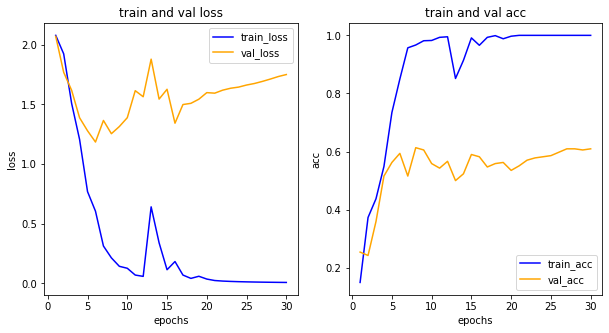

In [115]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [116]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 1s 117ms/step - loss: 1.5446 - acc: 0.6219


[1.5445880889892578, 0.621874988079071]

In [117]:
pred = model.predict(x_test)

In [118]:
pred

array([[4.63218288e-03, 5.02914377e-03, 9.18198049e-01, ...,
        4.07018745e-03, 1.16271302e-02, 1.21532185e-02],
       [2.31827162e-02, 3.30050290e-02, 1.04364837e-02, ...,
        7.75622129e-01, 2.16002055e-02, 8.15049838e-03],
       [1.10983499e-03, 1.73569977e-04, 2.02183169e-03, ...,
        2.24628346e-03, 2.00344180e-03, 1.45471189e-03],
       ...,
       [1.19697629e-02, 2.66134157e-03, 1.60547812e-02, ...,
        7.23865535e-03, 3.20667168e-03, 2.87066028e-03],
       [5.55973616e-04, 1.17492309e-04, 1.01679668e-03, ...,
        1.95721281e-04, 6.01682230e-04, 9.94989932e-01],
       [2.53435079e-04, 1.30264624e-03, 1.44213662e-02, ...,
        1.96650019e-03, 9.69327748e-01, 2.54341122e-03]], dtype=float32)

In [179]:
model.save(best_model_LSTM.h5)

NameError: ignored

In [ ]:
loaded_model_LSTM = load_model('best_model_LSTM.h5')

In [124]:
sample = input("뉴스 기사의 내용을 입력하세요 : ")

뉴스 기사의 내용을 입력하세요 : [이데일리 최훈길 기자] 글로벌 IT 기업 구글과 메타(옛 페이스북)가 우리나라 이용자들의 개인정보를 불법 수집해 역대 최대 과징금 처분을 받았다.  개인정보보호위원회(개보위)는 14일 정부서울청사에서 전체회의를 열고 구글과 메타에 위반행위 시정명령과 함께 구글에 692억원, 메타에 308억원의 과징금을 부과했다. 구글과 메타는 이용자 동의 없이 개인정보(이용자의 행태정보)를 수집해 온라인 맞춤형 광고에 활용해 개인정보 보호법을 위반했다.  이번 처분 결과는 온라인 맞춤형 광고 플랫폼의 행태정보 수집·이용과 관련된 최초 제재다. 1000억원의 과징금이 부과된 것은 개인정보보호 법규 위반 사건 중 사상 최대 규모다.


In [180]:
data = re.sub(sub_text," ",sample)
print(data)

 이데일리 최훈길 기자  글로벌 IT 기업 구글과 메타 옛 페이스북 가 우리나라 이용자들의 개인정보를 불법 수집해 역대 최대 과징금 처분을 받았다   개인정보보호위원회 개보위 는 14일 정부서울청사에서 전체회의를 열고 구글과 메타에 위반행위 시정명령과 함께 구글에 692억원  메타에 308억원의 과징금을 부과했다  구글과 메타는 이용자 동의 없이 개인정보 이용자의 행태정보 를 수집해 온라인 맞춤형 광고에 활용해 개인정보 보호법을 위반했다   이번 처분 결과는 온라인 맞춤형 광고 플랫폼의 행태정보 수집 이용과 관련된 최초 제재다  1000억원의 과징금이 부과된 것은 개인정보보호 법규 위반 사건 중 사상 최대 규모다 


In [181]:
morph = okt.morphs(data, stem=True)

In [182]:
for txt in morph:
  if txt not in stopword:
    morphs = morphs + " " + txt
print(morphs)

 [ 이데일리 최훈 길 기자 ] 글로벌 IT 기업 구글 메타 ( 옛 페이스북 ) 우리나라 이용자 개인정보 불법 수집 역대 최대 과징금 처분 받았다 . 개인 정보보호 위원회 ( 보위 ) 14일 정부 서울 청사 전체 회의 열고 구글 메타 위반 행위 시정 명령 함께 구글 692억원 , 메타 308억원 과징금 부과 했다 . 구글 메타 이용자 동의 없이 개인정보 ( 이용자 행태 정보 ) 수집 온라인 맞춤 형 광고 활용 개인정보 보호 법 위반 했다 . 이번 처분 결과 온라인 맞춤 형 광고 플랫폼 행태 정보 수집 · 이용 관련 된 최초 제재 다 . 1000억원 과징금 부과 된 개인 정보보호 법규 위반 사건 사상 최대 규모 다 . 이데일리 최훈 길 기자 글로벌 IT 기업 구글 메타 옛 페이스북 우리나라 이용자 개인정보 불법 수집 역대 최대 과징금 처분 받았다 개인 정보보호 위원회 보위 14일 정부 서울 청사 전체 회의 열고 구글 메타 위반 행위 시정 명령 함께 구글 692억원 메타 308억원 과징금 부과 했다 구글 메타 이용자 동의 없이 개인정보 이용자 행태 정보 수집 온라인 맞춤 형 광고 활용 개인정보 보호 법 위반 했다 이번 처분 결과 온라인 맞춤 형 광고 플랫폼 행태 정보 수집 이용 관련 된 최초 제재 다 1000억원 과징금 부과 된 개인 정보보호 법규 위반 사건 사상 최대 규모 다 이데일리 최훈 길 기자 글로벌 IT 기업 구글 메타 옛 페이스북 가다 우리나라 이용자 개인정보 불법 수집 역대 최대 과징금 처분 받다 개인 정보보호 위원회 보위 늘다 14일 정부 서울 청사 전체 회의 열다 구글 메타 위반 행위 시정 명령 함께 구글 692억원 메타 308억원 과징금 부과 구글 메타 이용자 동의 없이 개인정보 이용자 행태 정보 수집 온라인 맞춤 형 광고 활용 개인정보 보호 법 위반 이번 처분 결과 온라인 맞춤 형 광고 플랫폼 행태 정보 수집 이용 관련 최초 제재 다 1000억원 과징금 부과 개인 정보보호 법규 위반 사건 사상 최대 규모 다


In [193]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(morphs)
to_token = tokenizer.texts_to_sequences([morphs])

In [194]:
print(to_token)

[[1, 1, 52, 1, 1, 1, 1, 1, 1, 58, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 1, 1, 1, 1, 20, 1, 1, 1, 1, 1, 1, 1, 45, 1, 1, 1, 1, 1, 101, 1, 1, 49, 1, 1, 8, 1, 1, 1, 49, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 52, 1, 1, 1, 1, 1, 1, 58, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 1, 1, 1, 1, 20, 1, 1, 1, 1, 1, 1, 1, 45, 1, 1, 1, 1, 1, 1, 1, 49, 1, 1, 8, 1, 1, 1, 49, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 52, 1, 1, 1, 1, 1, 1, 58, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 1, 1, 1, 1, 20, 1, 1, 1, 1, 1, 1, 45, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8]]


In [195]:
max_len = 500

In [196]:
from tensorflow.keras.preprocessing import sequence

to_token =sequence.pad_sequences(to_token,maxlen=max_len)
print('샘플의 크기 : ', to_token.shape)

샘플의 크기 :  (1, 500)


In [197]:
to_token

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [198]:
pred = model.predict(to_token, batch_size = 10)
print(pred.shape)
print(f'각 클래스에 속할 확률 : \n{pred[0]}')

(1, 8)
각 클래스에 속할 확률 : 
[1.3231755e-04 7.8130967e-04 6.0364883e-03 5.2688536e-03 4.5825753e-04
 1.4816157e-03 9.8474771e-01 1.0933650e-03]


In [199]:
news_dic = {0:'정치',1:'경제',2:'사회',3:'문화',4:'세계',5:'과학',6:'연예',7:'스포츠'}

In [200]:
idx = np.argmax(pred[0])
print(idx)

6


In [201]:
pred.shape

(1, 8)

In [208]:
import re
import pandas as pd
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from konlpy.tag import Okt

news_dic = {0:'정치',1:'경제',2:'사회',3:'문화',4:'세계',5:'과학',6:'연예',7:'스포츠'}
# 텍스트 입력
sample = input("뉴스 기사의 내용을 입력하세요 : ")
# 특수문자 제거
data = re.sub(sub_text," ",sample)
# 형태소로 변환
new_sentence = okt.morphs(data, stem=True)
new_sentence = [word for word in new_sentence if not word in stopword]
print(new_sentence)
# 토큰화
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(morphs)
to_token = tokenizer.texts_to_sequences([morphs])
# 패딩
to_token =sequence.pad_sequences(to_token,maxlen=max_len)
print('샘플의 크기 : ', to_token.shape)

pred = model.predict(to_token, batch_size = 10)
print(pred.shape)
print(f'각 클래스에 속할 확률 : \n{pred[0]}')

idx = np.argmax(pred[0])
print(news_dic[idx])

KeyboardInterrupt: ignored

In [166]:
news_dic = {0:'정치',
1:'경제',
2:'사회',
3:'문화',
4:'세계',
5:'과학',
6:'연예',
7:'스포츠'}

In [204]:
news_dic[5]

'과학'

In [ ]:
#불용어 제거
new_sentence = [word for word in new_sentence if not word in stopword]
new_sentence

In [ ]:
encodeed = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
to_token =sequence.pad_sequences(to_token,maxlen=max_len) # 패딩


In [105]:
# from tensorflow.keras.layers import LSTM, Flatten, Dense, Embedding, Conv1D, MaxPooling1D,GlobalMaxPooling1D
# from tensorflow.keras.models import Sequential

# model = Sequential()

# model.add(Embedding(input_dim = vocab_size, output_dim = 32))
# model.add(Conv1D(64, 7, activation = 'relu'))
# model.add(MaxPooling1D(7))
# model.add(Conv1D(32, 5, activation = 'relu'))
# model.add(MaxPooling1D(5))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(8,activation = 'softmax'))

# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
#               metrics = ['acc'])
# model.summary()

# history = model.fit(x_train, y_train,
#                     batch_size = 32, epochs = 30,
#                     validation_data = (x_val,y_val))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          400352    
                                                                 
 conv1d_14 (Conv1D)          (None, None, 64)          14400     
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, None, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, None, 32)          10272     
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, None, 32)         0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_7 (Glo  (None, 32)              

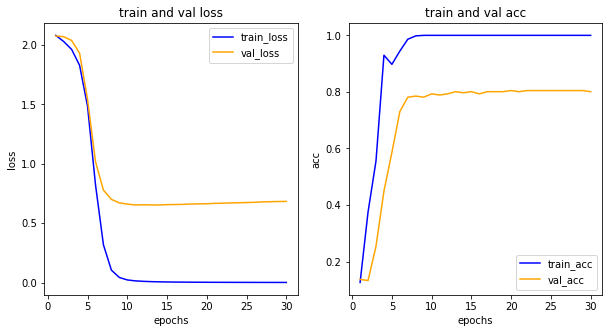

In [106]:
# import matplotlib.pyplot as plt

# his_dict = history.history
# loss = his_dict['loss']
# val_loss = his_dict['val_loss']

# epochs = range(1, len(loss)+1)
# fig = plt.figure(figsize = (10, 5))

# ax1 = fig.add_subplot(1,2,1)
# ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
# ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
# ax1.set_title('train and val loss')
# ax1.set_xlabel('epochs')
# ax1.set_ylabel('loss')
# ax1.legend()

# acc = his_dict['acc']
# val_acc = his_dict['val_acc']

# ax2 = fig.add_subplot(1,2,2)
# ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
# ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
# ax2.set_title('train and val acc')
# ax2.set_xlabel('epochs')
# ax2.set_ylabel('acc')
# ax2.legend()

# plt.show()